# Assignment 5 (Multiple Linear Regression)-Q2

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
toyota=pd.read_csv('E:\My folder\ExcelR\Assignments\Multi Linear Regression\ToyotaCorolla.csv')

In [ ]:
toyota.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
df = pd.DataFrame(toyota)

In [ ]:
data=df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [ ]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [ ]:
data1 = data.rename({'Age_08_04':'Age','Quarterly_Tax':'Tax'}, axis=1)

In [ ]:
data1

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# Scatterplot between variables along with histograms

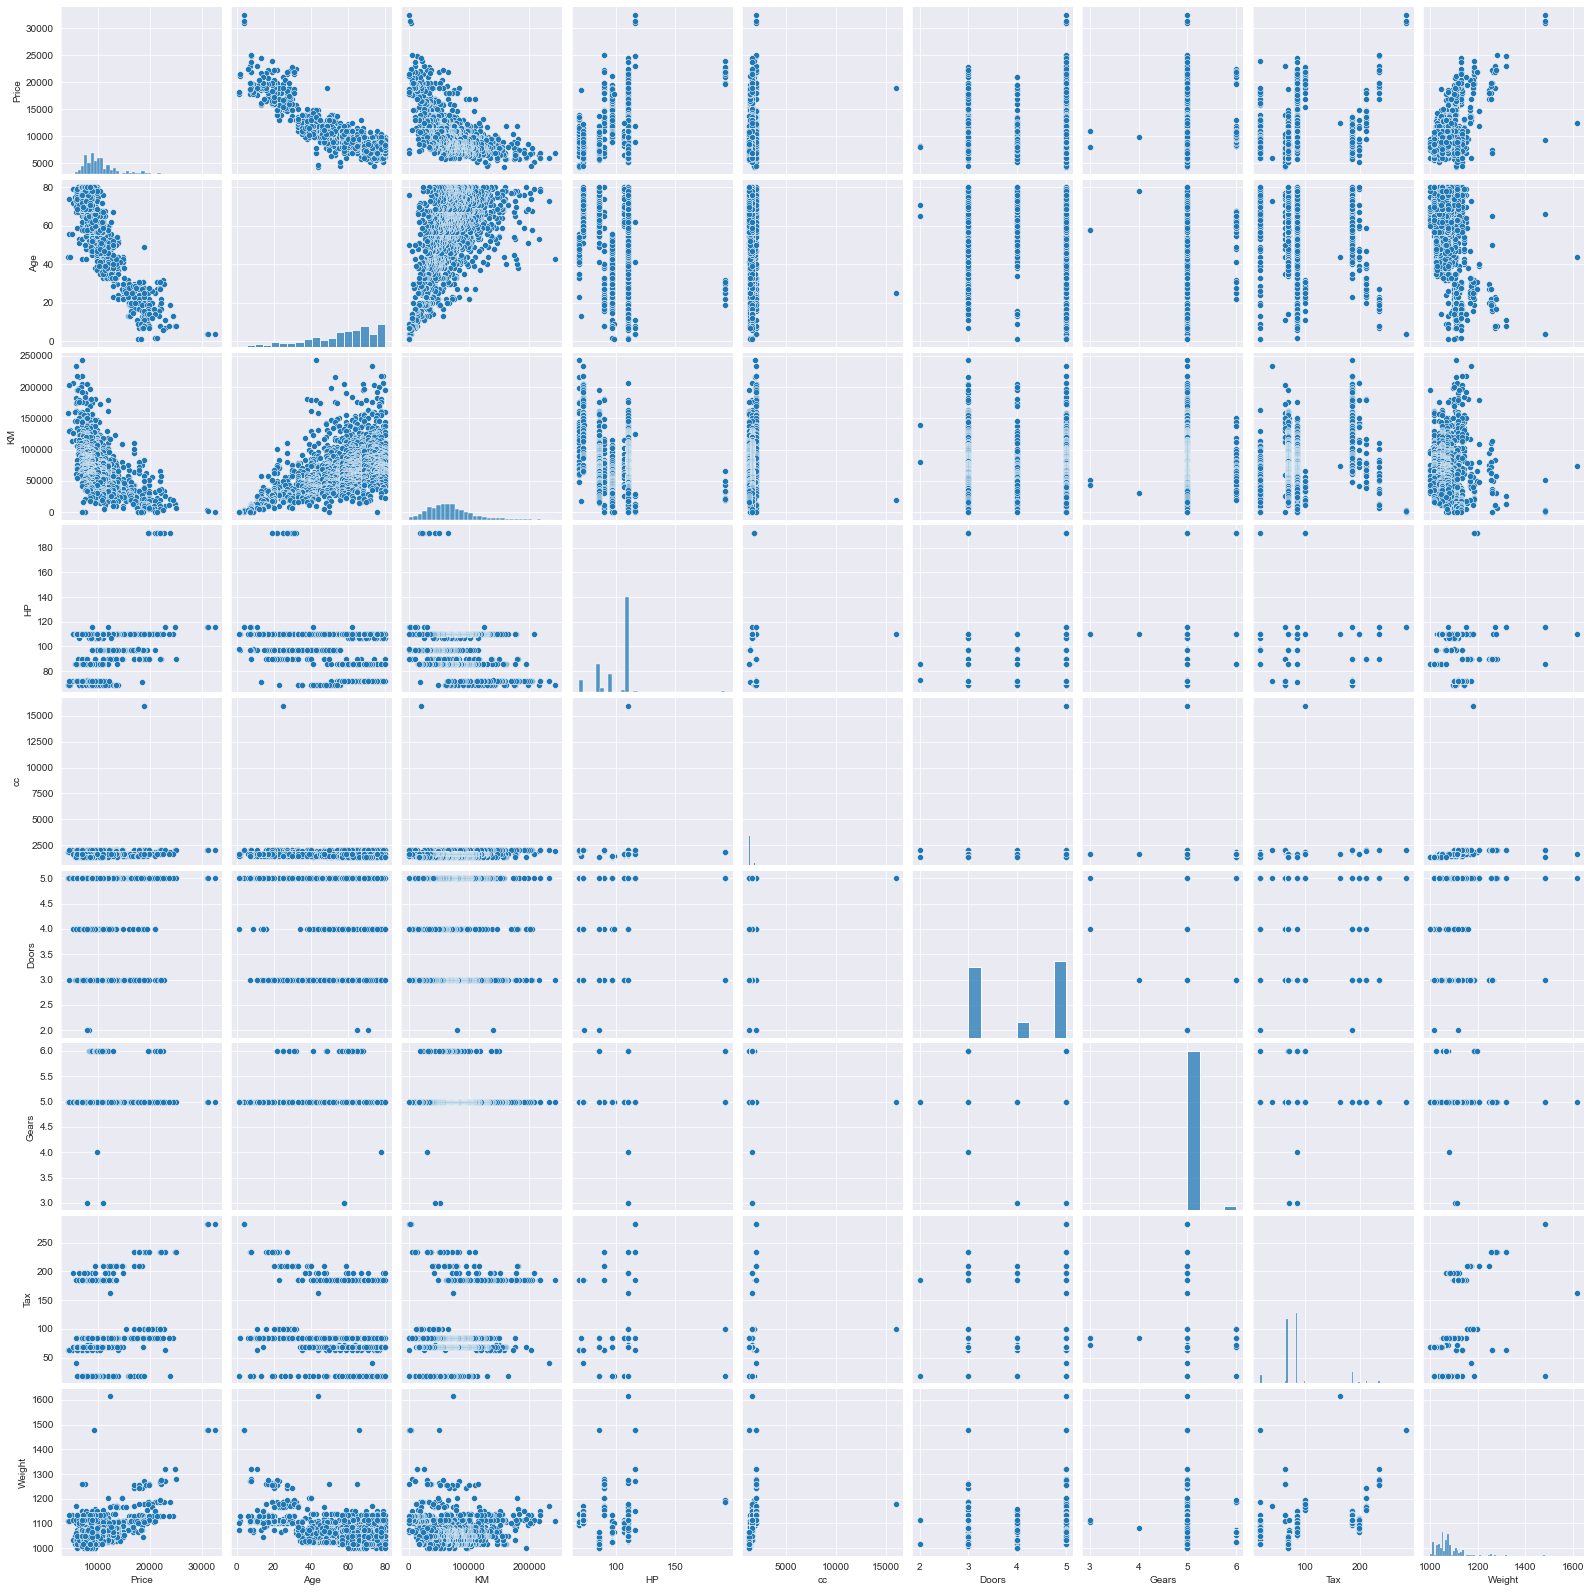

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data1)

# Built Model

In [ ]:
# Built Model
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=data1).fit()

In [ ]:
# Coefficient parameter
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Tax             3.949081
Weight         16.958632
dtype: float64

In [ ]:
# t-values and p-values
model.tvalues , model.pvalues

(Intercept    -3.948666
 Age         -46.511852
 KM          -16.621622
 HP           11.241018
 cc           -1.344222
 Doors        -0.040410
 Gears         3.016007
 Tax           3.014535
 Weight       15.879803
 dtype: float64,
 Intercept     8.241949e-05
 Age          3.354724e-288
 KM            7.538439e-57
 HP            3.757218e-28
 cc            1.790902e-01
 Doors         9.677716e-01
 Gears         2.606549e-03
 Tax           2.619148e-03
 Weight        2.048576e-52
 dtype: float64)

In [ ]:
# Rsquared value
model.rsquared , model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

# Simple Linear Regression Model

In [ ]:
ml_c=smf.ols('Price~cc',data=data1).fit()
#t and p-Values
ml_c.tvalues , ml_c.pvalues

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [ ]:
ml_d=smf.ols('Price~Doors',data=data1).fit()
#t and p-Values
ml_d.tvalues , ml_d.pvalues

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [ ]:
ml_cd=smf.ols('Price~cc+Doors',data=data1).fit()
#t and p-Values
ml_cd.tvalues , ml_cd.pvalues

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

# Model Validation Technique
## 1) Variance inflation factor (VIF)

In [ ]:
# 1) Collinearity Problem Check
#  VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+Tax+Weight',data=data1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+Tax+Weight',data=data1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+Tax+Weight',data=data1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+Tax+Weight',data=data1).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+Tax+Weight',data=data1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+Tax+Weight',data=data1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_Tax=smf.ols('Tax~Age+KM+HP+cc+Doors+Gears+Weight',data=data1).fit().rsquared
vif_Tax=1/(1-rsq_Tax)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+Tax',data=data1).fit().rsquared
vif_WT=1/(1-rsq_WT)

In [ ]:
# Storing vif values in a data frame
d1 = {'Variables':['Age' , 'KM' , 'HP' , 'cc' , 'Doors' , 'Gears' , 'Tax' , 'Weight'],'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_DR,vif_GR,vif_Tax,vif_WT]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Tax,2.311431
7,Weight,2.516420


## 2) Residual Analysis

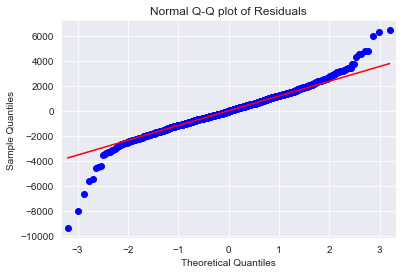

In [ ]:
qqplot=sm.qqplot(model.resid,line='q')     # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [ ]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [ ]:
list(np.where(model.resid<-6000))

[array([221, 601, 960], dtype=int64)]

## i) Residual plot of Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

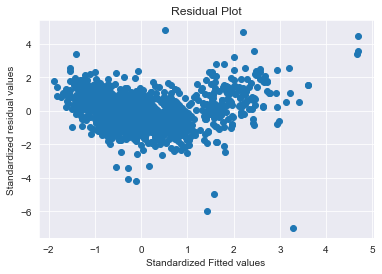

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## ii) Residual Vs Regressors (Test for error)

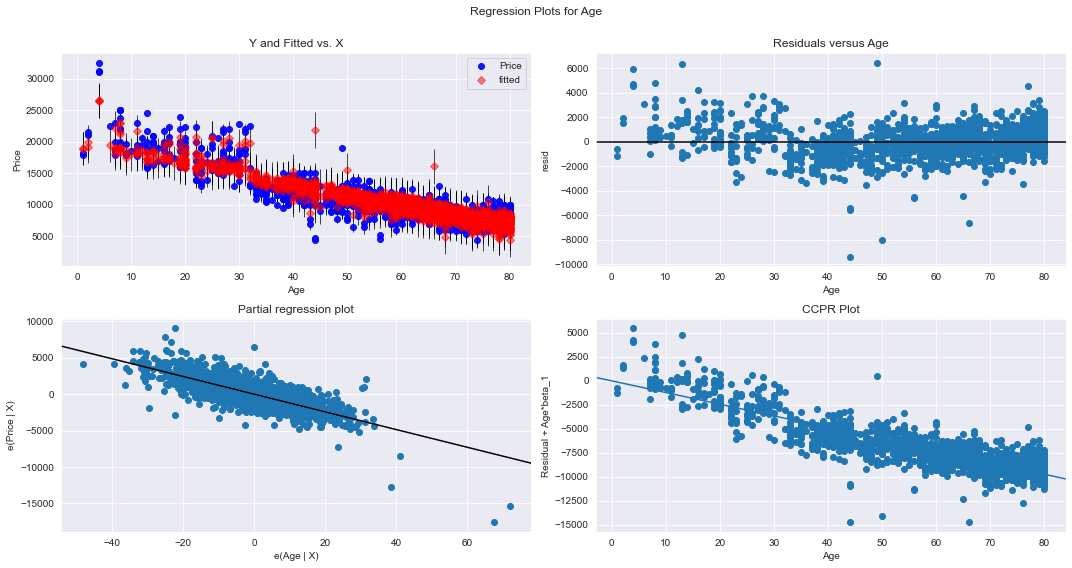

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

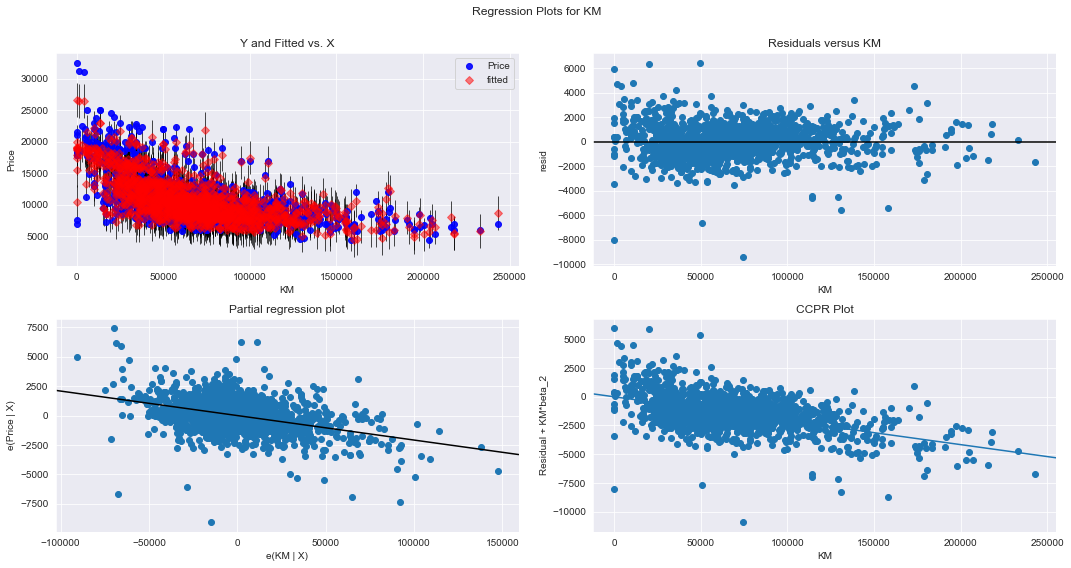

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

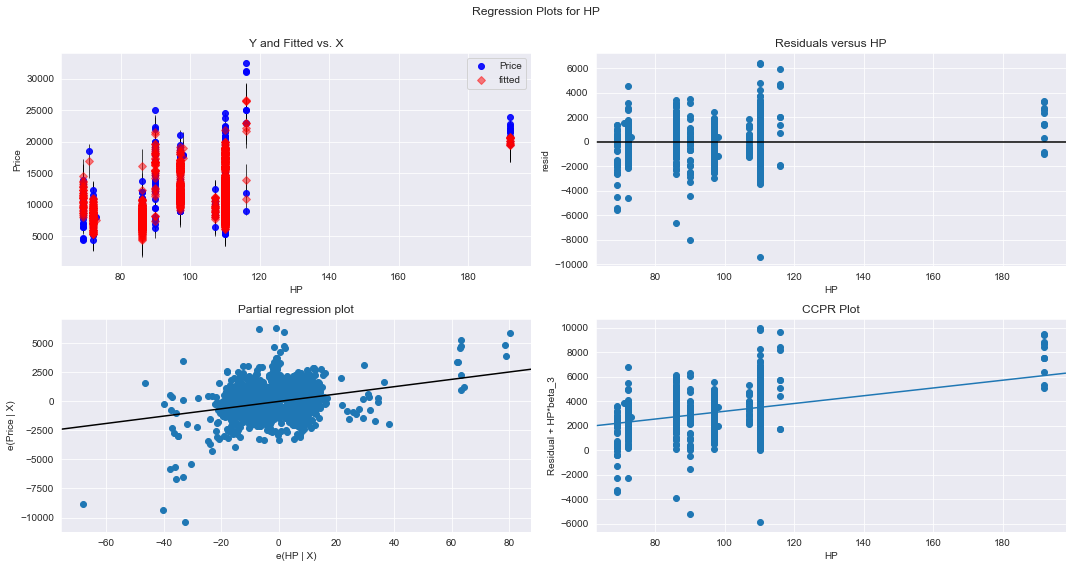

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

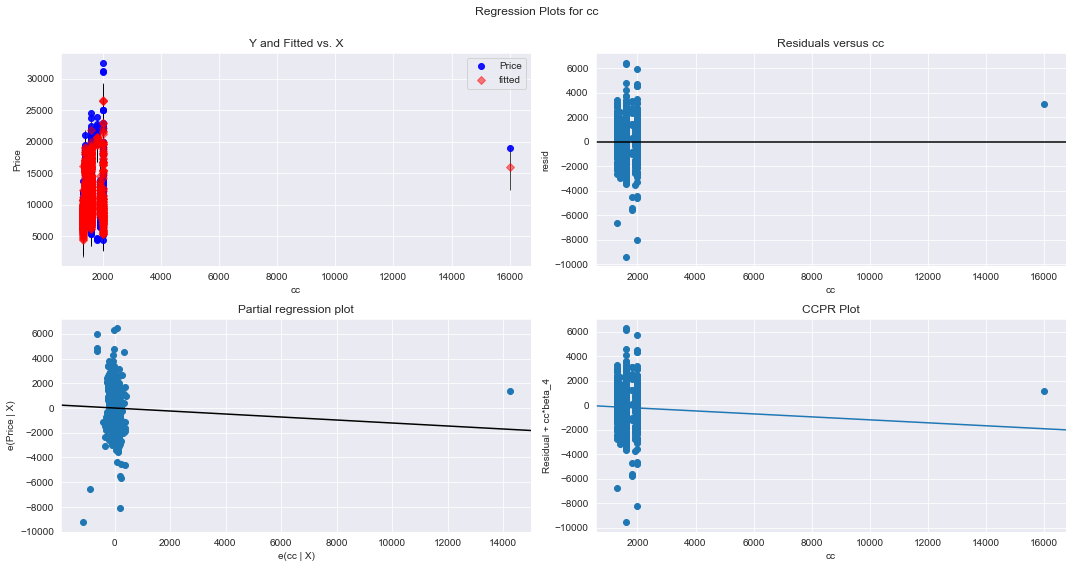

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

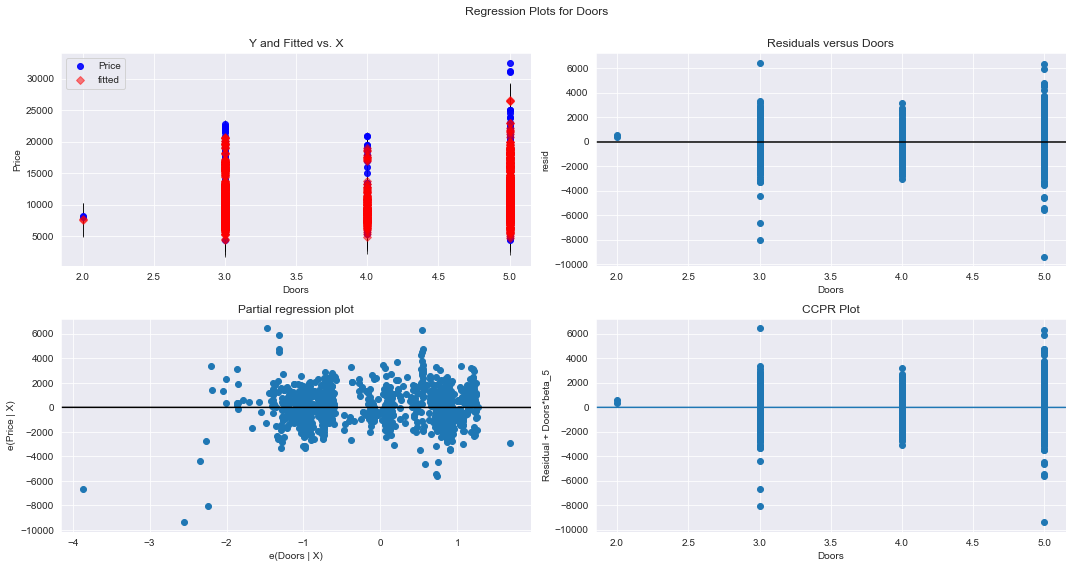

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

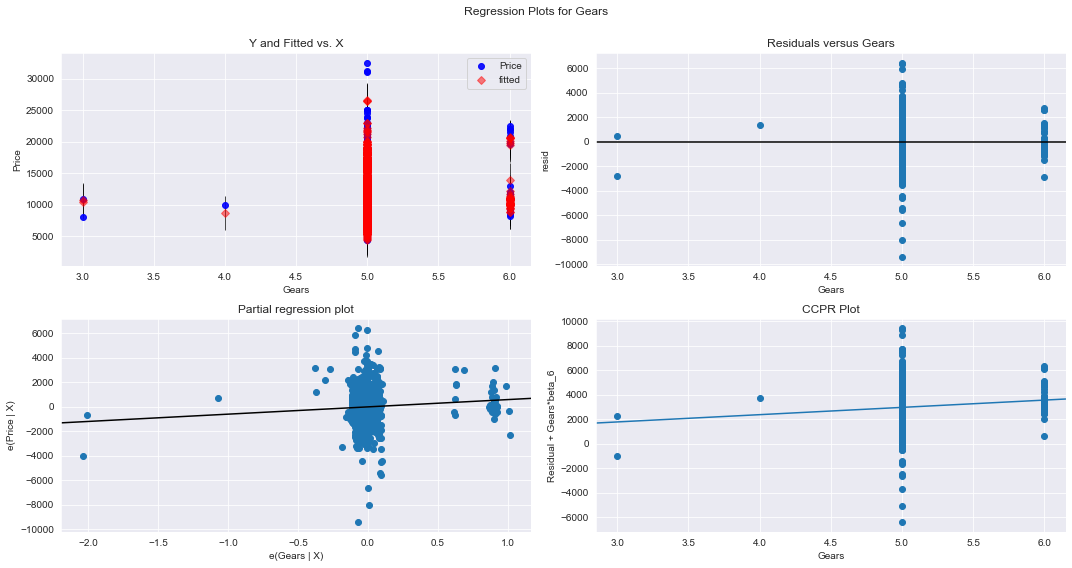

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

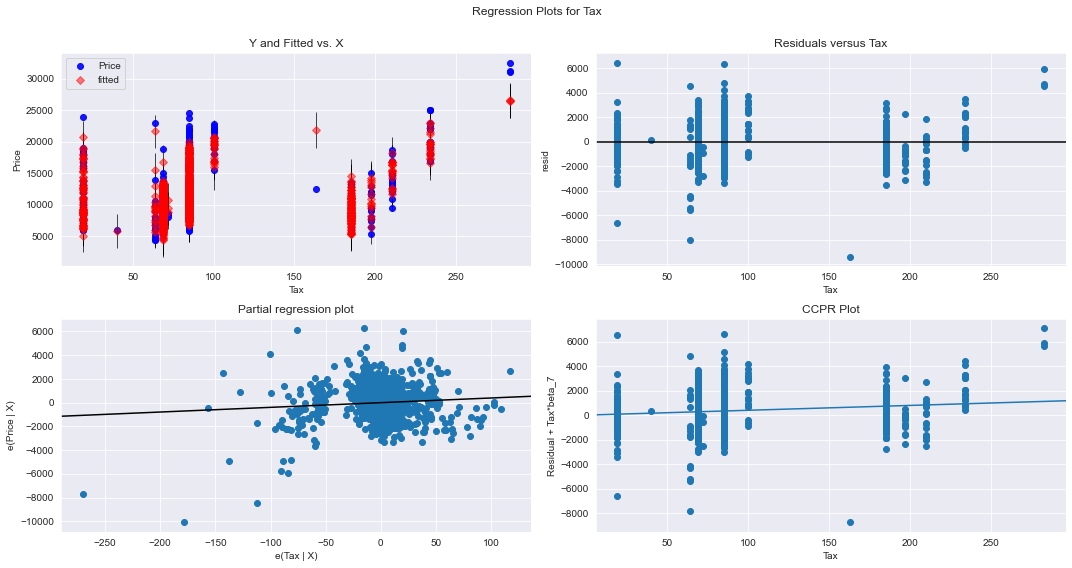

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Tax", fig=fig)
plt.show()

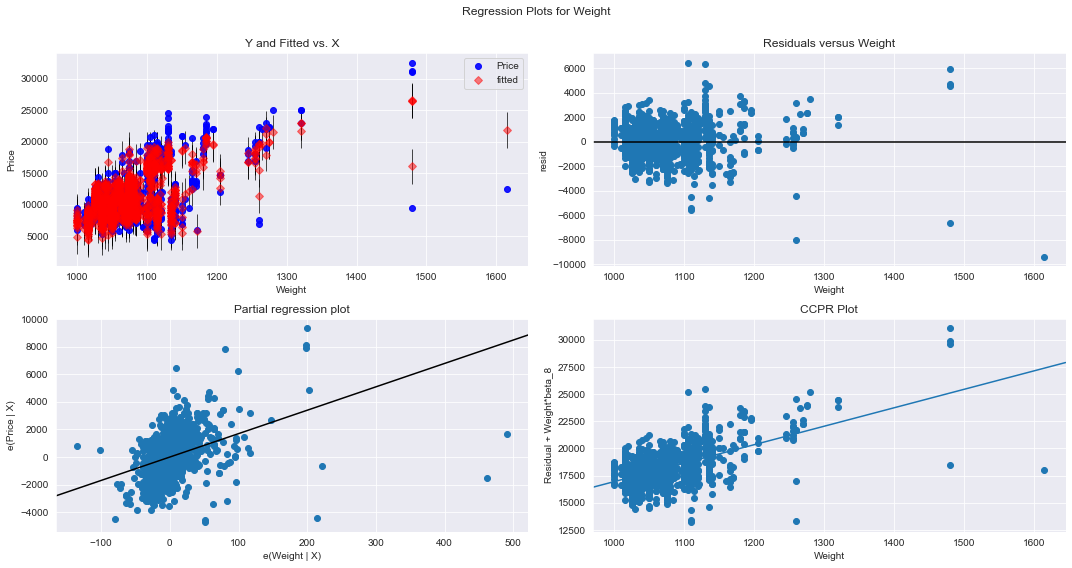

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
## 1) Cook's Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

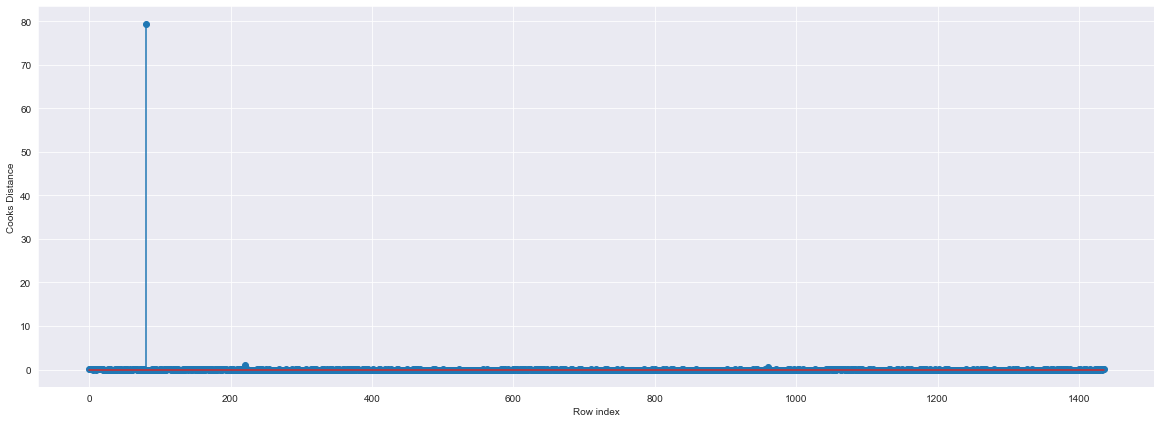

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138181)

## 2) High Influence points

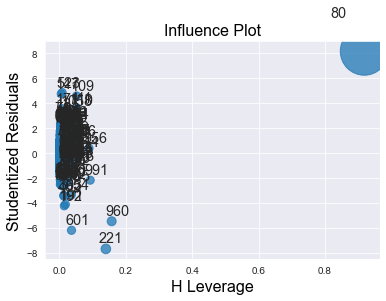

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

#### From the above plot, it is evident that data point 80 is the influencer

In [ ]:
data1[data1.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
#See the differences in HP and other variable values
data1.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Improving the model

In [ ]:
# Creating a copy of data so that original dataset is not affected
new=data1.copy()
new

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
new2=new.drop(new.index[[80]],axis=0).reset_index()
new2

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


# Model Dletion and Final Model

In [ ]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=new2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    new2=new2.drop(new2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    new2
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=new2).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8894191849749751


In [ ]:
new2

,index,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1431,7500,69,20544,86,1300,3,5,69,1025
1428,1432,10845,72,19000,86,1300,3,5,69,1015
1429,1433,8500,71,17016,86,1300,3,5,69,1015
1430,1434,7250,70,16916,86,1300,3,5,69,1015


# Predicting for New Data

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'Age':32,'KM':38000,'HP':80,'cc':3000,'Doors':4,'Gears':4,'Tax':200,'Weight':1023},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,32,38000,80,3000,4,4,200,1023


In [ ]:
final_model.predict(new_data)

0    6265.571199
dtype: float64

In [ ]:
pred_y=final_model.predict(new)
pred_y

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1431     9161.797882
1432     8536.169181
1433     8681.605150
1434     8793.704782
1435    10863.423359
Length: 1436, dtype: float64